# Aluno: Roberto Martins

In [2]:
!pip install scikit-learn-extra

In [3]:
from sklearn_extra.cluster import KMedoids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline

## Load and Prepare Data

In [4]:
data = pd.read_csv("/Users/rmartin0/Downloads/dist.countries.csv", sep=';')
data

,BEL,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG,ZAI
0,0.00,5.58,7.00,7.08,4.83,2.17,6.42,3.42,2.50,6.08,5.25,4.75
1,5.58,0.00,6.50,7.00,5.08,5.75,5.00,5.50,4.92,6.67,6.83,3.00
2,7.00,6.50,0.00,3.83,8.17,6.67,5.58,6.42,6.25,4.25,4.50,6.08
3,7.08,7.00,3.83,0.00,5.83,6.92,6.00,6.42,7.33,2.67,3.75,6.67
4,4.83,5.08,8.17,5.83,0.00,4.92,4.67,5.00,4.50,6.00,5.75,5.00
5,2.17,5.75,6.67,6.92,4.92,0.00,6.42,3.92,2.25,6.17,6.08,4.83
6,6.42,5.00,5.58,6.00,4.67,6.42,0.00,6.17,6.33,6.17,6.08,4.83
7,3.42,5.50,6.42,6.42,5.00,3.92,6.17,0.00,2.75,6.92,5.83,6.17
8,2.50,4.92,6.25,7.33,4.50,2.25,6.33,2.75,0.00,6.17,6.67,5.67
9,6.08,6.67,4.25,2.67,6.00,6.17,6.17,6.92,6.17,0.00,3.67,6.50


Criando uma matriz de distâncias pré-computadas.

In [5]:
D = pairwise_distances(data, metric='precomputed')

In [6]:
D

array([[0.  , 5.58, 7.  , 7.08, 4.83, 2.17, 6.42, 3.42, 2.5 , 6.08, 5.25,
        4.75],
       [5.58, 0.  , 6.5 , 7.  , 5.08, 5.75, 5.  , 5.5 , 4.92, 6.67, 6.83,
        3.  ],
       [7.  , 6.5 , 0.  , 3.83, 8.17, 6.67, 5.58, 6.42, 6.25, 4.25, 4.5 ,
        6.08],
       [7.08, 7.  , 3.83, 0.  , 5.83, 6.92, 6.  , 6.42, 7.33, 2.67, 3.75,
        6.67],
       [4.83, 5.08, 8.17, 5.83, 0.  , 4.92, 4.67, 5.  , 4.5 , 6.  , 5.75,
        5.  ],
       [2.17, 5.75, 6.67, 6.92, 4.92, 0.  , 6.42, 3.92, 2.25, 6.17, 6.08,
        4.83],
       [6.42, 5.  , 5.58, 6.  , 4.67, 6.42, 0.  , 6.17, 6.33, 6.17, 6.08,
        4.83],
       [3.42, 5.5 , 6.42, 6.42, 5.  , 3.92, 6.17, 0.  , 2.75, 6.92, 5.83,
        6.17],
       [2.5 , 4.92, 6.25, 7.33, 4.5 , 2.25, 6.33, 2.75, 0.  , 6.17, 6.67,
        5.67],
       [6.08, 6.67, 4.25, 2.67, 6.  , 6.17, 6.17, 6.92, 6.17, 0.  , 3.67,
        6.5 ],
       [5.25, 6.83, 4.5 , 3.75, 5.75, 6.08, 6.08, 5.83, 6.67, 3.67, 0.  ,
        6.92],
       [4.75, 3.  , 6

Chamando a função K-medoids com a função de distância pré-computada.

In [7]:
kmedoids = KMedoids(n_clusters=3, metric='precomputed', method='pam', init='random',  random_state=123).fit(D)
kmedoids.labels_

array([1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2])

Combinamos os clusters e os rótulos dos países.

In [8]:
country_clust = pd.DataFrame([data.columns.values, kmedoids.labels_])
country_clust

,0,1,2,3,4,5,6,7,8,9,10,11
0,BEL,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG,ZAI
1,1,2,0,0,1,1,2,1,1,0,0,2


# MDS

In [9]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [10]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=123)
X = mds.fit_transform(D)

/Users/rmartin0/miniconda3/envs/agile/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


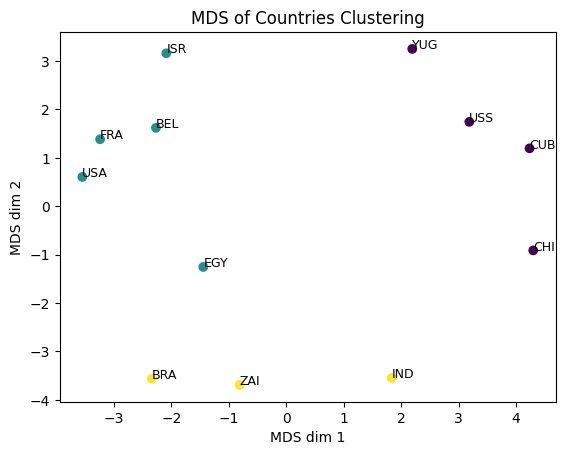

In [12]:
scatter = plt.scatter(X[:,0], X[:,1], c=kmedoids.labels_)
for i, country in enumerate(data.columns.values):
    plt.annotate(country, (X[i,0], X[i,1]), fontsize=9)

plt.title('MDS of Countries Clustering')
plt.xlabel('MDS dim 1')
plt.ylabel('MDS dim 2')
plt.show()